In [2]:
from tensorflow import keras
from keras import layers
from PIL import Image, ImageEnhance

import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# input layer
input_img = keras.Input(shape = (32, 32, 3))

# encoder portion of the autoencoder
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# decoder portion of the autoencoder
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1024, (2, 2), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)

# building our model 
autoencoder = keras.Model(input_img, decoded) 
autoencoder.compile(optimizer = keras.optimizers.Adam(learning_rate= 0.0001),
                        loss='binary_crossentropy', metrics=['Accuracy'])


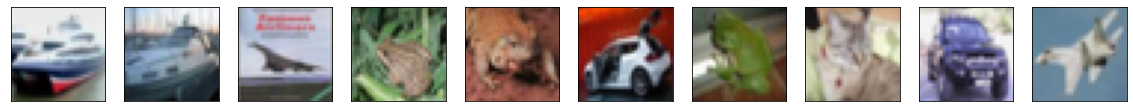

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# importing cifar10 dataset for train/test
from keras.datasets import cifar10

(x_train, _), (x_test, _) = cifar10.load_data()

#### shows training images ####
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### preps data for algo ####
x_train = x_train.astype('float16') / 255.
x_test = x_test.astype('float16') / 255.

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

print(x_train.shape)
print(x_test.shape)

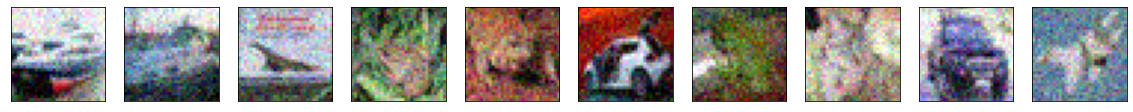

In [4]:
# adding noise to the dataset for training data
noise_factor = 0.10
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#### shows training image noise examples ####
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# training autoencoder, optimum for training data was 45 epochs
history = autoencoder.fit(x_train_noisy, x_train, epochs = 20, batch_size=64, shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
782/782 [==============================] - 255s 320ms/step - loss: 0.6045 - Accuracy: 0.6267 - val_loss: 0.5886 - val_Accuracy: 0.7183
Epoch 2/20
782/782 [==============================] - 258s 329ms/step - loss: 0.5829 - Accuracy: 0.7195 - val_loss: 0.5815 - val_Accuracy: 0.7208
Epoch 3/20
782/782 [==============================] - 256s 327ms/step - loss: 0.5779 - Accuracy: 0.7320 - val_loss: 0.5773 - val_Accuracy: 0.7373
Epoch 4/20
782/782 [==============================] - 242s 310ms/step - loss: 0.5754 - Accuracy: 0.7392 - val_loss: 0.5758 - val_Accuracy: 0.7485
Epoch 5/20
782/782 [==============================] - 241s 308ms/step - loss: 0.5735 - Accuracy: 0.7437 - val_loss: 0.5739 - val_Accuracy: 0.7491
Epoch 6/20
782/782 [==============================] - 240s 306ms/step - loss: 0.5720 - Accuracy: 0.7483 - val_loss: 0.5726 - val_Accuracy: 0.7448
Epoch 7/20
782/782 [==============================] - 239s 306ms/step - loss: 0.5707 - Accuracy: 0.7506 - val_loss: 0.5718 -

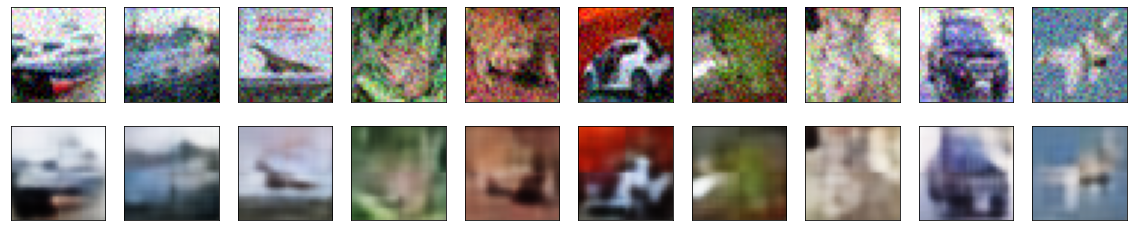

In [6]:
# model predictions
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,4))
for i in range(1, n + 1):
    #### Displays original, noisy images ####
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #### Displays reconstructed images ####
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

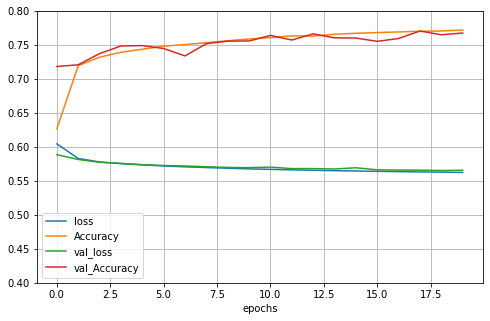

INFO:tensorflow:Assets written to: c:\Users\bahul\Desktop\!coding\CubeSat\noise-repo/attempt3autoencoder\assets


In [7]:
# visualization of autoencoder training 
pd.DataFrame(history.history).plot(figsize = (8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0.4, 0.8)
plt.xlabel("epochs", )
plt.show()

# saving the autoencoder
autoencoder.save(f"{os.getcwd()}/autoencoderfile-latest-run")

In [8]:
# evaluating autoencoder training on test set 
    # (should be validated on a validation set but one was not made)
autoencoder.evaluate(x_test_noisy, x_test, batch_size = 1)

10000/10000 [==============================] - 65s 6ms/step - loss: 0.5657 - Accuracy: 0.7676


[0.5656847953796387, 0.7675713896751404]

In [3]:
# Real-world application 
ALGODIM_W = 32
ALGODIM_H = 32
MODELPATH = 'autoencoderfile-15epochs'
model = keras.models.load_model(MODELPATH) # loads the model into the program

def main():
    '''
    Runs all the helper functions, then saves the scaled images from 
    prepimagescale() and the predicted images from runalgo() to file.
    '''
    dir = os.getcwd()
    rawimgs = prepimagedict(dir)
    scaledimgs = prepimagescale(rawimgs)
    imgoutput = runalgo(scaledimgs)

    for filekeyscaled, filekeyout in zip(scaledimgs, imgoutput):
        imgout = imgoutput.get(filekeyout)
        imgout.save(f"{dir}\denoised32-32algo\output\{filekeyout}")

        imgscaled = scaledimgs.get(filekeyscaled)
        imgscaled.save(f"{dir}\denoised32-32algo\downscaled\{filekeyscaled}")
    print("All images saved.")
        

def prepimagedict(directory: str) -> dict:
    '''
    Gets the height and width of the image and scales both to a multiple 
    of 32 to prepare image for splitting into 32*32 chunks that will 
    then be fed to the algorithm. Returns a dictionary of images that
    were present in the given directory. 
    '''
    rawimgs = {}
    print(f"Image directory: {directory}")

    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(filename).convert('RGB')
            if img.size[0] > img.size[1]:
                imgsize = (math.ceil(img.size[0]/ALGODIM_W)*ALGODIM_W, 
                    math.ceil(img.size[0]/ALGODIM_H)*ALGODIM_H)
            else: 
                imgsize = (math.ceil(img.size[1]/ALGODIM_W)*ALGODIM_W, 
                    math.ceil(img.size[1]/ALGODIM_H)*ALGODIM_H)
            # gets h and w of img and scales to mult of 32
            
            img = ImageEnhance.Contrast(img).enhance(1.7) # enhances contrast of image for downscaling
            
            baseimg = Image.new("RGB", imgsize, "GRAY")
            # creates a new image that is a mult of 32 to offset scaling issues
            baseimg.paste(img, (0, 0)) 
            rawimgs.update({filename : baseimg})
            # baseimg.show()
            
    return rawimgs


def prepimagescale(rawimgs: dict) -> dict:
    '''
    Scales down an image to 32*32 pixels for the algorithm. 
    Returns a dictionary of ndarrays.
    '''
    imgkeys = rawimgs.keys() # imgkeys is type dict_keys, we must typecast to list first in order to index
    rescaledimgs = {}
    
    for imgname in list(imgkeys):
    
        img = rawimgs.get(imgname) # gets the image for a corresponding key
        
        #img.show()
        imgby32 = img.resize((32, 32))
        rescaledimgs.update({imgname : imgby32})
        #imgby32.show()

    return rescaledimgs


def runalgo(scaledimgs: dict) -> dict:
    '''
    Preps the scaled images, then runs them thru the autoencoder. 
    Returns a dictionary of the predicted images. 
    '''
    tupleimglist = list(scaledimgs.items())
    imglist = []
    algoimgs = {}

    for img in tupleimglist:
        imglist.append(np.asarray(img[1]))
    
    imgarr = np.array(imglist).astype('float16')/255.
    #print(imgarr)
    predimgs = model.predict(imgarr)

    for image, key in zip(predimgs, list(scaledimgs.keys())):
        algoimgs.update({key : Image.fromarray(np.uint8(image*255))})
    
    return algoimgs


if __name__ == '__main__':
    main()

Image directory: c:\Users\bahul\Desktop\!coding\CubeSat\noise-repo
All images saved.
